<a href="https://colab.research.google.com/github/lewinskie254/eda/blob/main/bivariate_stats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('http://ishelp.info/data/insurance.csv')

In [4]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
bmi = df['bmi']
charges = df['charges']
age = df['age']
correlation = np.corrcoef(bmi, charges)[0, 1]
correlation = np.corrcoef(age, charges)[0, 1]
correlation

np.float64(0.29900819333064754)

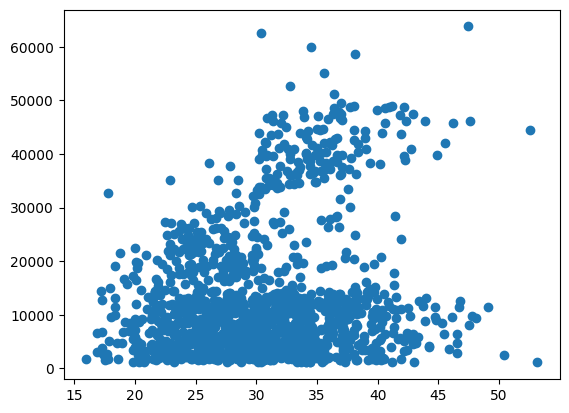

In [6]:
plt.scatter(bmi, charges)
plt.show()

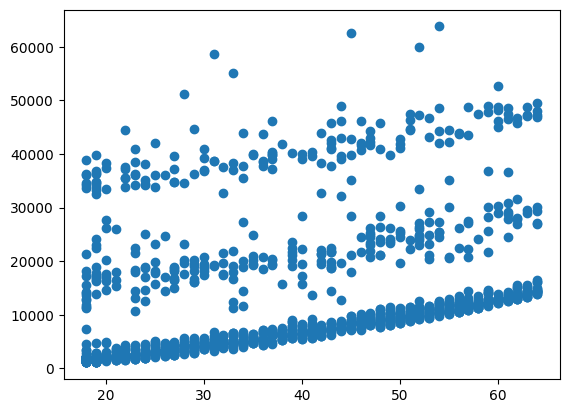

In [7]:
plt.scatter(age, charges)

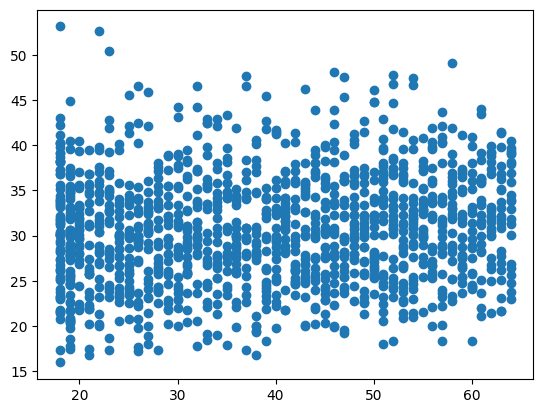

In [8]:
plt.scatter(age, bmi)

In [9]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [10]:
south_west = np.mean(df[df['region'] == 'southwest']['charges'])
south_east = np.mean(df[df['region'] == 'southeast']['charges'])
north_east = np.mean(df[df['region'] == 'northeast']['charges'])
north_west = np.mean(df[df['region'] == 'northwest']['charges'])

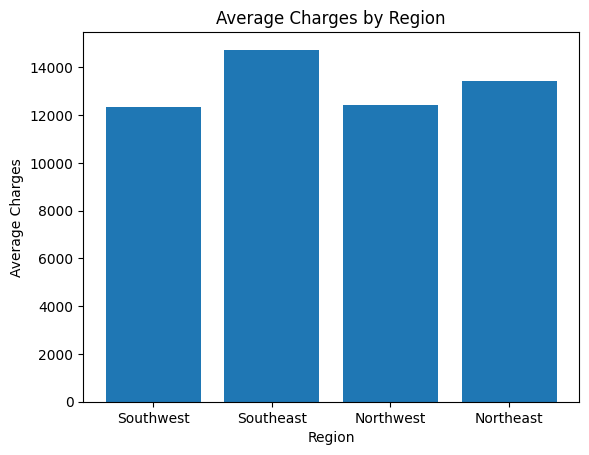

In [11]:
regions = ['Southwest', 'Southeast', 'Northwest', 'Northeast']
means = [south_west, south_east, north_west, north_east]

plt.bar(regions, means)
plt.xlabel('Region')
plt.ylabel('Average Charges')
plt.title('Average Charges by Region')
plt.show()

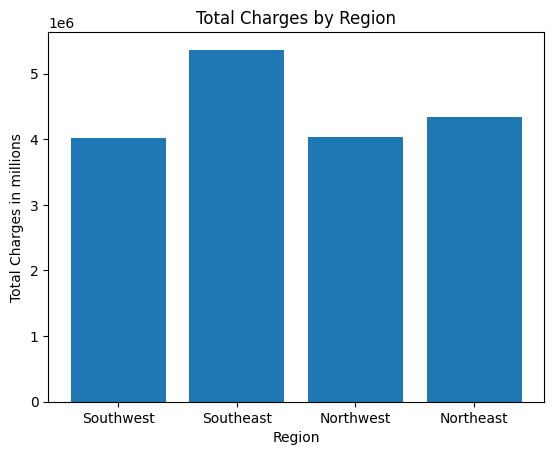

In [12]:
#total charges per region
south_west = np.sum(df[df['region'] == 'southwest']['charges'])
south_east = np.sum(df[df['region'] == 'southeast']['charges'])
north_east = np.sum(df[df['region'] == 'northeast']['charges'])
north_west = np.sum(df[df['region'] == 'northwest']['charges'])

regions = ['Southwest', 'Southeast', 'Northwest', 'Northeast']
sums = [south_west, south_east, north_west, north_east]

plt.bar(regions, sums)
plt.xlabel('Region')
plt.ylabel('Total Charges in millions')
plt.title('Total Charges by Region')
plt.show()

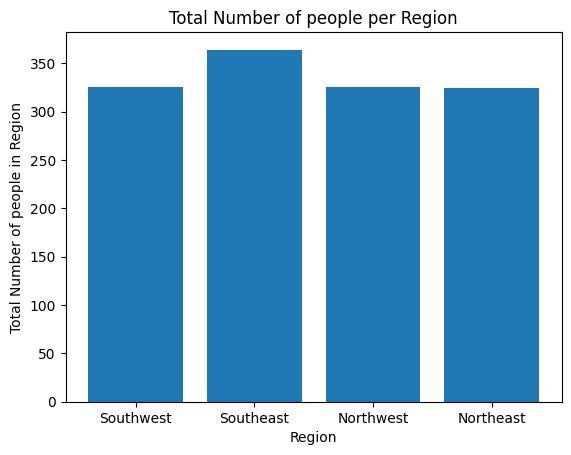

In [13]:
#total number of people per region

south_west = len(df[df['region'] == 'southwest']['charges'])
south_east = len(df[df['region'] == 'southeast']['charges'])
north_east = len(df[df['region'] == 'northeast']['charges'])
north_west = len(df[df['region'] == 'northwest']['charges'])

regions = ['Southwest', 'Southeast', 'Northwest', 'Northeast']
total = [south_west, south_east, north_west, north_east]

plt.bar(regions, total)
plt.xlabel('Region')
plt.ylabel('Total Number of people in Region')
plt.title('Total Number of people per Region')
plt.show()

In [14]:
len(df)

1338

In [15]:
age_groups_nums = { i: len(df[df['age'] == i]) for i in age.unique()}
ages = list(age.unique())
total_number_per_age_group = [age_groups_nums[i] for i in age_groups_nums.keys()]

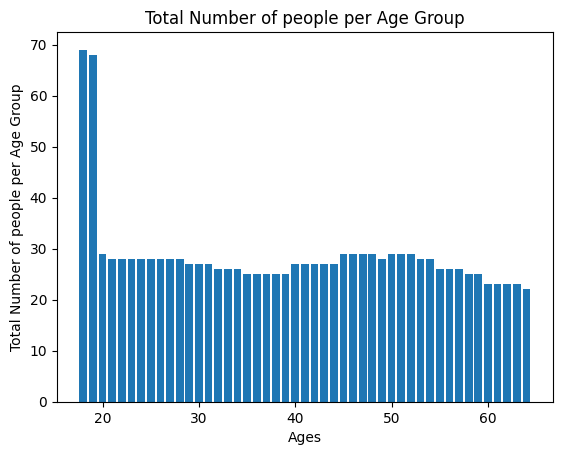

In [16]:
plt.bar(ages, total_number_per_age_group)
plt.xlabel('Ages')
plt.ylabel('Total Number of people per Age Group')
plt.title('Total Number of people per Age Group')
plt.show()

In [17]:
len(df[df['age'] == 60])

23

In [18]:
charges_per_age_group = { i: np.mean(df[df['age'] == i]['charges']) for i in age.unique()}
new_charges = [mean for mean in charges_per_age_group.values()]

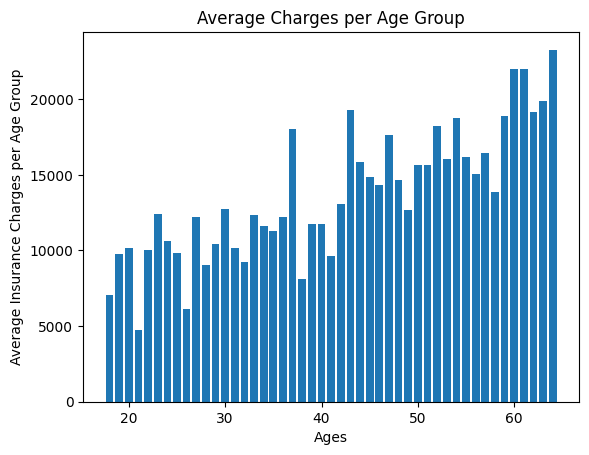

In [19]:
plt.bar(ages, new_charges)
plt.xlabel('Ages')
plt.ylabel('Average Insurance Charges per Age Group')
plt.title('Average Charges per Age Group')
plt.show()

In [20]:
heights = [1.55, 1.60, 1.65, 1.70, 1.75, 1.80, 1.85, 1.90, 1.95, 2.00]
weights = [50, 60, 58, 65, 72, 80, 90, 100, 110, 120]
bmis = [20.8, 23.4, 21.3, 22.5, 23.5, 24.7, 26.3, 27.7, 28.9, 30.0]


In [21]:
np.corrcoef(heights, weights, bmis)

array([[1.        , 0.98411543],
       [0.98411543, 1.        ]])

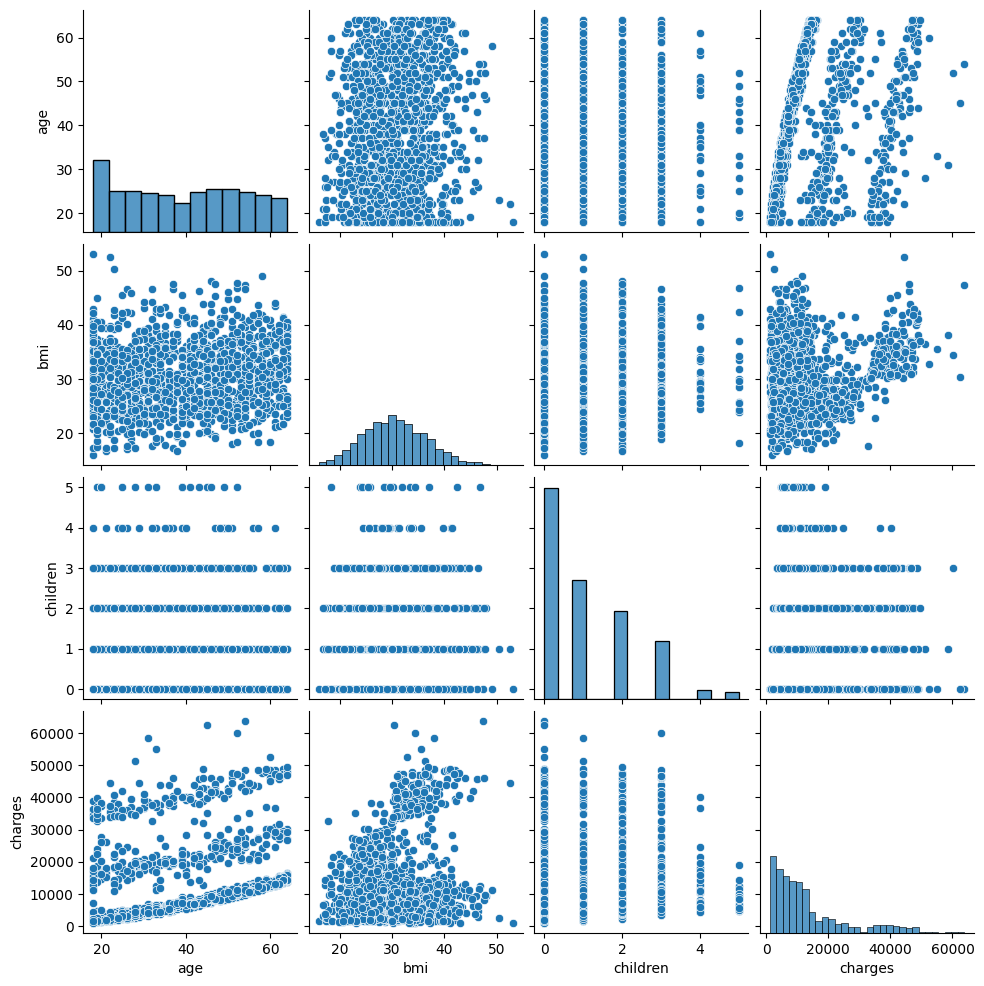

In [23]:
sns.pairplot(df)

<Axes: xlabel='bmi', ylabel='Count'>

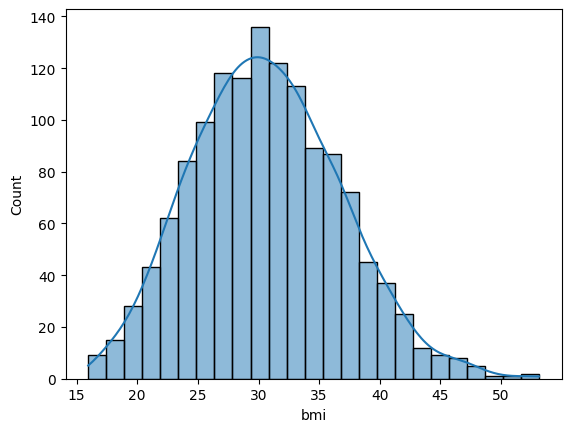

In [26]:
sns.histplot(df['bmi'], kde=True)

<Axes: xlabel='age', ylabel='Count'>

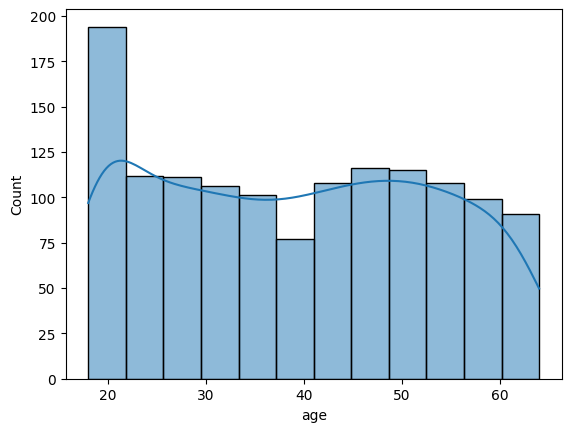

In [27]:
sns.histplot(df['age'], kde=True)

<Axes: xlabel='charges', ylabel='Count'>

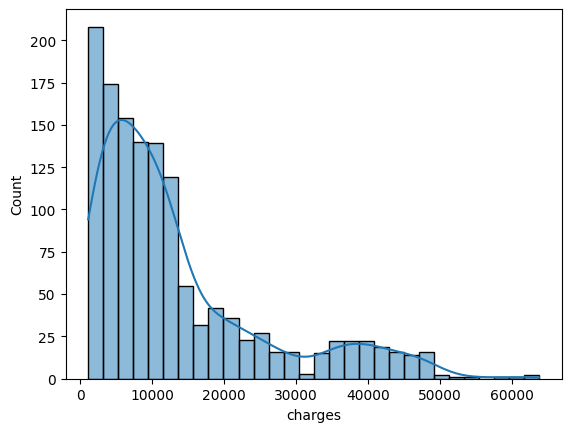

In [28]:
sns.histplot(df['charges'], kde=True)

<Axes: xlabel='charges', ylabel='Count'>

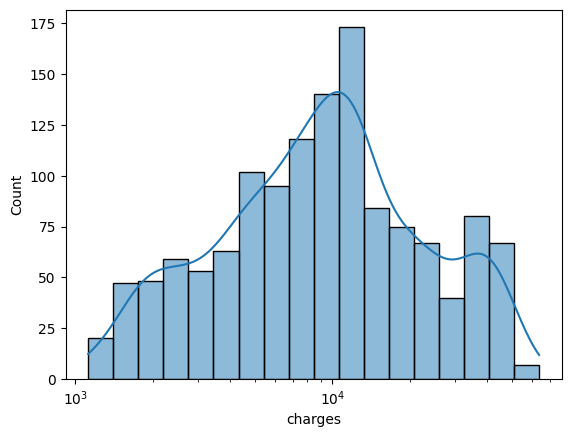

In [29]:
sns.histplot(df['charges'], kde=True, log_scale=True)

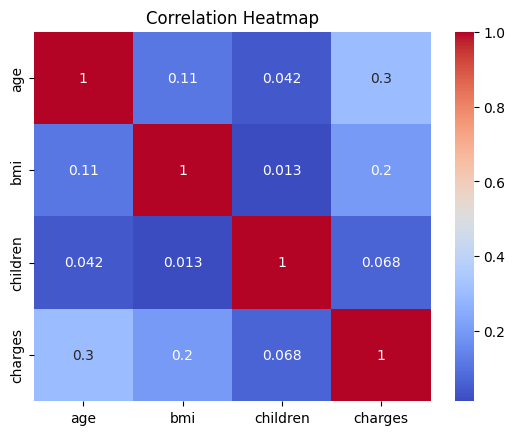

In [30]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [32]:
df.corr(numeric_only=True)

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


In [38]:
corr, p = stats.pearsonr(df.charges, df.age)
corr, p

(np.float64(0.29900819333064754), np.float64(4.886693331718529e-29))

In [42]:
corr_df = pd.DataFrame(columns = ['correlation', 'p_value'])

for col in df:
  if pd.api.types.is_numeric_dtype(df[col]):
    r, p = stats.pearsonr(df.charges, df[col])
    corr_df.loc[col] = r, p

corr_df

,correlation,p_value
age,0.299008,4.886693e-29
bmi,0.198341,2.459086e-13
children,0.067998,1.285213e-02
charges,1.000000,0.000000e+00
